In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
import glob

import warnings
warnings.filterwarnings("ignore")

data_path = '/content/drive/Shareddrives/Parking_pred/kunik'

Mounted at /content/drive


In [2]:
train = pd.read_excel(data_path + '/data_0625/train.xlsx')
test = pd.read_excel(data_path + '/data_0625/test.xlsx')

submission = pd.read_excel('/content/drive/Shareddrives/Parking_pred/data/Encoded/sample_submission.xlsx')

In [3]:
train_code = ['C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']
test_code = ['C2335', 'C1327']
submission_code = ['C2335', 'C1327', 'C2675']

for c in train_code:
    train = train[train['단지코드'] != c]

for c in test_code:
    test = test[test['단지코드'] != c]

# for c in submission_code:
#     submission = submission[submission['code'] != c]

train.shape, test.shape, submission.shape

((2896, 15), (1016, 14), (150, 2))

In [4]:
c2085 = train[train['단지코드'] == 'C2085'].index
train.loc[c2085, '단지코드'] = 'C1397'

c1397 = train[train['단지코드'] == 'C1397'].index
train.loc[c1397, '총세대수'] = 1339

In [5]:
c2461 = train[train['단지코드'] == 'C2431'].index
train.loc[c2461, '단지코드'] = 'C1649'

c1649 = train[train['단지코드'] == 'C1649'].index
train.loc[c1649, '총세대수'] = 1047
train.loc[c1649, '등록차량수'] = 1214

In [6]:
c2675 = test[test['단지코드'] == 'C2675']
c2675['등록차량수'] = 1279
c2675['단지코드'] = 'C1036'
c2675

test = test[test['단지코드'] != 'C2675']

train = train.append(c2675)
train = train.reset_index(drop=True)
c1036 = train[train['단지코드'] == 'C1036'].index
train.loc[c1036, '총세대수'] = 1254

test[test['단지코드'] == 'C2675'], train[train['단지코드'] == 'C1036']

(Empty DataFrame
 Columns: [단지코드, 총세대수, 임대건물구분, 지역, 공급유형, 전용면적, 전용면적별세대수, 공가수, 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 단지내주차면수]
 Index: [],        단지코드  총세대수 임대건물구분  ... 도보 10분거리 내 버스정류장 수 단지내주차면수  등록차량수
 1490  C1036  1254    아파트  ...                3.0    1016   1279
 1491  C1036  1254    아파트  ...                3.0    1016   1279
 1492  C1036  1254    아파트  ...                3.0    1016   1279
 1493  C1036  1254    아파트  ...                3.0    1016   1279
 1494  C1036  1254    아파트  ...                3.0    1016   1279
 1495  C1036  1254    아파트  ...                3.0    1016   1279
 1496  C1036  1254    아파트  ...                3.0    1016   1279
 2896  C1036  1254    아파트  ...                3.0    1016   1279
 2897  C1036  1254    아파트  ...                3.0    1016   1279
 2898  C1036  1254    아파트  ...                3.0    1016   1279
 2899  C1036  1254    아파트  ...                3.0    1016   1279
 2900  C1036  1254    아파트  ...                3.0    

In [7]:
def get_mod_miss_households(data):
    total = data.iloc[0]['총세대수']
    sum_hh = data['전용면적별세대수'].sum()
    miss = total - sum_hh
    prop = (data['전용면적별세대수'] / sum_hh).tolist()
    miss_prop = [int(p * miss) for p in prop]
    int_miss = miss - sum(miss_prop)
    for i in range(int_miss):
        miss_prop[(i)%len(miss_prop)] += 1

    update = miss_prop+data['전용면적별세대수']
    return update

total_miss = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804',
                'C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
                'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
                'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
                'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
                'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']

for tm in total_miss:
    if train[train['단지코드'] == tm].shape[0] == 0 and test[test['단지코드'] == tm].shape[0] == 0:
        print("Empty: {}".format(tm))

        continue  

    elif train[train['단지코드'] == tm].shape[0] == 0:
        mod = get_mod_miss_households(test[test['단지코드'] == tm])
        idx = test[test['단지코드'] == tm].index
        test.loc[idx, '전용면적별세대수'] = mod
        print(test[test['단지코드'] == tm])
    else:
        mod = get_mod_miss_households(train[train['단지코드'] == tm])
        idx = train[train['단지코드'] == tm].index
        train.loc[idx, '전용면적별세대수'] = mod
        print(train[train['단지코드'] == tm])

# Empty 'C1218'

       단지코드  총세대수 임대건물구분  ... 도보 10분거리 내 버스정류장 수 단지내주차면수  등록차량수
2144  C1490   749    아파트  ...                3.0     759    899
2145  C1490   749    아파트  ...                3.0     759    899
2146  C1490   749    아파트  ...                3.0     759    899
2147  C1490   749    아파트  ...                3.0     759    899

[4 rows x 15 columns]
      단지코드  총세대수  ... 도보 10분거리 내 버스정류장 수 단지내주차면수
729  C2497   488  ...                  6     624
730  C2497   488  ...                  6     624
731  C2497   488  ...                  6     624
732  C2497   488  ...                  6     624

[4 rows x 14 columns]
       단지코드  총세대수 임대건물구분  ... 도보 10분거리 내 버스정류장 수 단지내주차면수  등록차량수
2164  C2620  1029    아파트  ...                6.0    1061   1709
2165  C2620  1029    아파트  ...                6.0    1061   1709
2166  C2620  1029    아파트  ...                6.0    1061   1709
2167  C2620  1029    아파트  ...                6.0    1061   1709
2168  C2620  1029    아파트  ...                6.0    1061   1709

[5 r

In [8]:
# 인덱스 재설정해서 빈 인덱스 채움
train.reset_index(drop = True, inplace=True)
test.reset_index(drop = True, inplace=True)
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17,A,9216000.0,82940.0,0.0,3.0,624,205
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17,A,12672000.0,107130.0,0.0,3.0,624,205
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17,A,12672000.0,107130.0,0.0,3.0,624,205
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17,A,18433000.0,149760.0,0.0,3.0,624,205
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17,A,18433000.0,149760.0,0.0,3.0,624,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,C1036,1254,아파트,경기도,국민임대,46.90,50,9,A,34082000.0,232200.0,0.0,3.0,1016,1279
2900,C1036,1254,아파트,경기도,국민임대,46.90,88,9,A,34082000.0,232200.0,0.0,3.0,1016,1279
2901,C1036,1254,아파트,경기도,국민임대,47.40,30,9,A,34082000.0,232200.0,0.0,3.0,1016,1279
2902,C1036,1254,아파트,경기도,국민임대,51.93,75,9,A,43819000.0,275900.0,0.0,3.0,1016,1279


In [9]:
check_Nan = train.isnull()
print(check_Nan.sum())
check_Nan

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2902,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
check_Nan = test.isnull()
print(check_Nan.sum())
check_Nan

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,False,False,False,False


outlier detecting


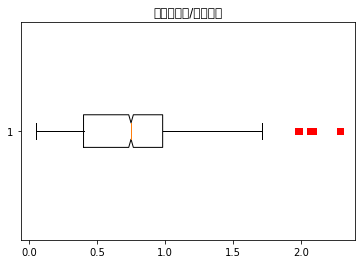

In [11]:
# box plot
import matplotlib.pyplot as plt
import seaborn as sns

tm_train = train['등록차량수']/train['총세대수']

plt.boxplot(tm_train, notch=1, sym='rs',vert=0)

plt.title('등록차량수/총세대수')
plt.show()


In [12]:
train.shape

(2904, 15)

In [13]:
# 아웃라이어 제거

def get_outlier(data, weight=1.5):
    quantile_25 = np.percentile(tm_train.values, 25)
    quantile_75 = np.percentile(tm_train.values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = tm_train[ (tm_train < lowest) | (tm_train > highest) ].index
    return outlier_idx


outlier_idx = get_outlier(train, weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)

# 인덱스 재설정해서 빈 인덱스 채움
train.reset_index(drop = True, inplace=True)

train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17,A,9216000.0,82940.0,0.0,3.0,624,205
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17,A,12672000.0,107130.0,0.0,3.0,624,205
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17,A,12672000.0,107130.0,0.0,3.0,624,205
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17,A,18433000.0,149760.0,0.0,3.0,624,205
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17,A,18433000.0,149760.0,0.0,3.0,624,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,C1036,1254,아파트,경기도,국민임대,46.90,50,9,A,34082000.0,232200.0,0.0,3.0,1016,1279
2879,C1036,1254,아파트,경기도,국민임대,46.90,88,9,A,34082000.0,232200.0,0.0,3.0,1016,1279
2880,C1036,1254,아파트,경기도,국민임대,47.40,30,9,A,34082000.0,232200.0,0.0,3.0,1016,1279
2881,C1036,1254,아파트,경기도,국민임대,51.93,75,9,A,43819000.0,275900.0,0.0,3.0,1016,1279


전용면적별 세대수에 비례해서 단지내주차면수, 등록차량수 변환

In [14]:
max(train['전용면적'].unique())

583.4

In [15]:
for i in range(len(test)):
  print(test['전용면적별세대수'][i] / test['총세대수'][i])

0.15384615384615385
0.03978779840848806
0.14854111405835543
0.15915119363395225
0.07957559681697612
0.06763925729442971
0.2625994694960212
0.08885941644562334
0.2717872968980798
0.022156573116691284
0.01624815361890694
0.04431314623338257
0.08567208271787297
0.1329394387001477
0.01772525849335303
0.3072378138847858
0.1019202363367799
0.13247172859450726
0.18578352180936994
0.05654281098546042
0.024232633279483037
0.03877221324717286
0.13893376413570274
0.13893376413570274
0.21324717285945072
0.07108239095315025
0.4266441821247892
0.13827993254637436
0.2934232715008432
0.14165261382799327
0.2174248265227448
0.110254433307633
0.06013878180416345
0.07093292212798766
0.18966846569005397
0.11719352351580571
0.1202775636083269
0.1141094834232845
0.10840932117527863
0.017223910840932118
0.23860182370820668
0.0364741641337386
0.034447821681864235
0.1702127659574468
0.0547112462006079
0.0364741641337386
0.24873353596757852
0.030395136778115502
0.0243161094224924
0.1816160118606375
0.47813194959

In [16]:
# # 왜 정수로 나오는지 의문

# def devide_parking_lots(data, devided_info):
#     for col in devided_info:
#         for i in range(len(data)):
#             prop = data['전용면적별세대수'][i] / data['총세대수'][i]
#             data[col][i]= (data[col][i] * prop)

# devided_info = ['단지내주차면수', '등록차량수']
# devide_parking_lots(train, devided_info)
# devided_info_test = ['단지내주차면수']
# devide_parking_lots(test, devided_info_test)
# train


In [17]:
# # base

# def devide_parking_lots(data, devided_info):
#     for col in devided_info:
#         temp=[]
#         for i in range(len(data)):
#             temp.append(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i]))
        
#         index = data.columns.get_loc(col)
#         data.insert(index,col+'_tm',temp,True)
#         data.drop([col], axis=1, inplace = True)
        
#         data.rename(columns={col+'_tm': col}, inplace = True)

# devided_info = ['단지내주차면수', '등록차량수']
# devide_parking_lots(train, devided_info)
# devided_info_test = ['단지내주차면수']
# devide_parking_lots(test, devided_info_test)
# train

In [18]:
train[train['임대건물구분']=='상가']['전용면적별세대수'].unique()

array([1, 2])

In [19]:
# # 상가는 올림

# import math

# def devide_parking_lots(data, devided_info):
#     for col in devided_info:
#         temp=[]
#         for i in range(len(data)):
#             if data['임대건물구분'][i] == '아파트':
#                 temp.append(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i]))
#             elif data['임대건물구분'][i] == '상가':
#                 temp.append(math.ceil(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i])))
#                 # 상가인 경우는 올림을 해줌
        
#         index = data.columns.get_loc(col)
#         data.insert(index,col+'_tm',temp,True)
#         data.drop([col], axis=1, inplace = True)
        
#         data.rename(columns={col+'_tm': col}, inplace = True)

# devided_info = ['단지내주차면수', '등록차량수']
# devide_parking_lots(train, devided_info)
# devided_info_test = ['단지내주차면수']
# devide_parking_lots(test, devided_info_test)
# train

In [20]:
# # 전용면적별세대수 비율로 나눠주는 비중 90%
# # 전용면적에 비율로 나눠주는 비중 10%


# import math

# def devide_parking_lots(data, devided_info, p=0.9):
#     for col in devided_info:
#         temp=[]
#         temp2=[]
#         for i in range(len(data)):
#             if data['임대건물구분'][i] == '아파트':
#                 temp.append((data[col][i])*p * (data['전용면적별세대수'][i] / data['총세대수'][i]))
#                 temp2.append((data[col][i])*(1-p)*(data['전용면적'][i] / data[data['단지코드']==data['단지코드'][i]]['전용면적'].sum()))
            
#             elif data['임대건물구분'][i] == '상가':
#                 temp.append(math.ceil(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i])))
#                 temp2.append(0)

#         print('\n전용면적별세대수 비례 '+str(temp))
#         print('전용면적 비례 '+str(temp2))
#         target = [x+y for x,y in zip(temp, temp2)]       
#         print('합 '+str(target))

#         index = data.columns.get_loc(col)
#         data.insert(index,col+'_tm',target,True)
#         data.drop([col], axis=1, inplace = True)
        
#         data.rename(columns={col+'_tm': col}, inplace = True)

# devided_info = ['단지내주차면수', '등록차량수']
# devide_parking_lots(train, devided_info, 0.9)
# devided_info_test = ['단지내주차면수']
# devide_parking_lots(test, devided_info_test, 0.9)
# train

In [21]:
# 전용면적별세대수 비율로 나눠주는 비중 90%
# 전용면적에 비율로 나눠주는 비중 10%

import math

def devide_parking_lots(data, devided_info, p=0.9):
    for col in devided_info:
        temp=[]
        temp2=[]
        for i in range(len(data)):
            if data['임대건물구분'][i] == '아파트':
                temp.append((data[col][i])*p * (data['전용면적별세대수'][i] / data['총세대수'][i]))

                denominator = (data[data['단지코드']==data['단지코드'][i]]['전용면적'] * data[data['단지코드']==data['단지코드'][i]]['전용면적별세대수']).sum()
                numerator = data['전용면적'][i]*data['전용면적별세대수'][i]
                temp2.append((data[col][i])*(1-p)*(numerator/denominator))
            
            elif data['임대건물구분'][i] == '상가':
                temp.append(math.ceil(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i])))
                temp2.append(0)

        print('\n전용면적별세대수 비례 '+str(temp))
        print('전용면적 비례 '+str(temp2))
        target = [x+y for x,y in zip(temp, temp2)]       
        print('합 '+str(target))

        index = data.columns.get_loc(col)
        data.insert(index,col+'_tm',target,True)
        data.drop([col], axis=1, inplace = True)
        
        data.rename(columns={col+'_tm': col}, inplace = True)

devided_info = ['단지내주차면수', '등록차량수']
devide_parking_lots(train, devided_info, 0.9)
devided_info_test = ['단지내주차면수']
devide_parking_lots(test, devided_info_test, 0.9)
train


전용면적별세대수 비례 [284.40660550458716, 61.827522935779825, 20.60917431192661, 39.15743119266055, 19.578715596330277, 109.22862385321102, 26.79192660550459, 273.9078947368421, 64.67269736842105, 32.33634868421053, 140.75822368421052, 70.37911184210526, 66.5748355263158, 66.5748355263158, 161.68174342105263, 161.68174342105263, 58.96628289473684, 58.96628289473684, 104.99602649006623, 104.99602649006623, 181.11814569536423, 83.99682119205298, 139.99470198675496, 45.498278145695366, 190.16379310344826, 21.68534482758621, 163.47413793103448, 205.17672413793102, 189.07950530035336, 23.018374558303886, 10.687102473498234, 159.4844522968198, 12.331272084805654, 70.69929328621909, 213.14895470383274, 97.6609756097561, 130.21463414634147, 169.74407665505228, 75.95853658536585, 111.61254355400698, 58.906620209059234, 58.906620209059234, 58.1315331010453, 58.1315331010453, 179.82020905923346, 64.3322299651568, 58.1315331010453, 173.7403846153846, 96.92884615384617, 39.32019230769231, 13.71634615384615

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17,A,9216000.0,82940.0,0.0,3.0,310.685463,102.068141
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17,A,12672000.0,107130.0,0.0,3.0,68.584592,22.531797
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17,A,12672000.0,107130.0,0.0,3.0,22.861531,7.510599
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17,A,18433000.0,149760.0,0.0,3.0,44.225802,14.529310
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17,A,18433000.0,149760.0,0.0,3.0,22.112901,7.264655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,C1036,1254,아파트,경기도,국민임대,46.90,50,9,A,34082000.0,232200.0,0.0,3.0,40.590582,51.097790
2879,C1036,1254,아파트,경기도,국민임대,46.90,88,9,A,34082000.0,232200.0,0.0,3.0,71.439425,89.932111
2880,C1036,1254,아파트,경기도,국민임대,47.40,30,9,A,34082000.0,232200.0,0.0,3.0,24.380775,30.691941
2881,C1036,1254,아파트,경기도,국민임대,51.93,75,9,A,43819000.0,275900.0,0.0,3.0,61.550485,77.483337


In [22]:
# import math

# def devide_parking_lots(data, devided_info, k):
#     for col in devided_info:
#         temp=[]
#         for i in range(len(data)):
#             if data['임대건물구분'][i] == '아파트':
#                 temp.append(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i])*k)
#             elif data['임대건물구분'][i] == '상가':
#                 temp.append(math.ceil(data[col][i] * (data['전용면적별세대수'][i] / data['총세대수'][i])))
#                 # 상가인 경우는 올림을 해줌
        
#         index = data.columns.get_loc(col)
#         data.insert(index,col+'_tm',temp,True)
#         data.drop([col], axis=1, inplace = True)
        
#         data.rename(columns={col+'_tm': col}, inplace = True)

# devided_info = ['단지내주차면수', '등록차량수']

# k=1.1
# devide_parking_lots(train, devided_info,k)
# devided_info_test = ['단지내주차면수']
# devide_parking_lots(test, devided_info_test,k)
# train

공가수 공가율로 전환

In [23]:
# for i in range(len(train)):  
#   print(train['공가수'][i] / train['총세대수'][i])

공가수를 공가율로 전환

In [24]:
# def vacant_ratio(data):
#     temp = []
#     for i in range(len(data)):  
#         temp.append(data['공가수'][i] / data['총세대수'][i])
#     data.insert(7,"공가율",temp,True)
#     data.drop(['공가수'],axis=1,inplace=True)
#     return data

# train = vacant_ratio(train)
# test = vacant_ratio(test)

지하철 노선 수, 결측값 처리 후 0 or 1 로 바꿔주기

In [25]:
# # 지하철이 있는 5개 지역 중 nan 값을 갖는 데이터는 1을 넣어주고 5개 지역이 아닌 데이터는 0넣어서 결측값 처리
# # 지하철이 한 개 이상 있는 데이터는 전부 1로 처리

# area = ['대전광역시', '경기도', '부산광역시', '대구광역시', '서울특별시']

# def subway(data, area):
#     tm = data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
#     na = pd.isna(tm)
#     if True in na:
#         for a in area:
#             data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(pd.Series(np.where(data['지역'] == a, 1, 0)), inplace=True)

#         tm = [t for t in tm if pd.isna(t) == False]        
#         tm.remove(0)
#         data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].replace(tm, 1, inplace=True)
#     else:
#         tm.remove(0)
#         data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].replace(tm, 1, inplace=True)

# subway(train, area)
# subway(test, area)


In [26]:
# 결측값만 처리

area = ['대전광역시', '경기도', '부산광역시', '대구광역시', '서울특별시']

def subway(data, area):
    tm = data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
    na = pd.isna(tm)
    if True in na:
        for a in area:
            data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(pd.Series(np.where(data['지역'] == a, 1, 0)), inplace=True)

        # tm = [t for t in tm if pd.isna(t) == False]        
        # tm.remove(0)
        # data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].replace(tm, 1, inplace=True)
    # else:
        # tm.remove(0)
        # data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].replace(tm, 1, inplace=True)

subway(train, area)
subway(test, area)

In [27]:
# train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()

버스 결측값 처리

In [28]:
# 지역 평균 값으로 결측값 채우기

def bus(data):
    area = data['지역'].unique()

    for a in area:
        n = np.rint(data[data['지역']==a]['도보 10분거리 내 버스정류장 수'].mean())
        data['도보 10분거리 내 버스정류장 수'].fillna(pd.Series(np.where(data['지역'] == a, n, data['지역'])), inplace=True)


bus(train)
bus(test)

check_Nan = train.isnull()
print(check_Nan.sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64


임대료 임대보증금 결측값 채우기


In [29]:
check_Nan = train.isnull()
print(check_Nan.sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64


In [30]:
# # 임대료 임대보증금 corr가장 큰 전용면적 이용해서 결측값 채움
# # proportion (임대료/전용면적)의 평균 이용

# def rent(data, feature):
#     for col in feature:
#         temp=[]
#         for i in range(len(data)):
#             temp.append(data[col][i]/data['전용면적'][i])

#         proportion = np.nanmean(temp)
#         print(col+" proportion = "+ str(proportion))

#         rent_mean =  data['전용면적']*proportion

#         data[col].fillna(pd.Series(np.where(pd.isnull(data[col]) == True, rent_mean, data[col])), inplace=True)



# feature = ['임대보증금', '임대료']
# rent(train, feature)
# rent(test, feature)

In [31]:
train['지역'].unique()

array(['경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [32]:
check_Nan = train.isnull()
print(check_Nan.sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64


In [33]:
train[train['지역']=='서울특별시']['임대료'].index

Int64Index([1257, 1940, 1941, 1942, 1943, 1944, 1945, 2022, 2023, 2024, 2025,
            2026, 2027, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064,
            2065, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088,
            2089, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150,
            2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2631, 2632, 2633,
            2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642],
           dtype='int64')

In [34]:
# 임대료 임대보증금 corr가장 큰 전용면적 이용해서 결측값 채움
# 지역별 proportion (임대료/전용면적)의 평균 이용

def rent(data, feature):
    for col in feature:
        area = train['지역'].unique()
        for a in area:
            temp=[]
            for i in data[data['지역']==a].index:
                temp.append(data[col][i] / data['전용면적'][i])
            proportion = np.nanmean(temp)

            for i in data[data['지역']==a].index:
                new_rent =  data['전용면적'][i]*proportion

            data[col].fillna(pd.Series(np.where(pd.isnull(data[col]) == True, new_rent, data[col])), inplace=True)

feature = ['임대보증금', '임대료']
rent(train, feature)
rent(test, feature)

# 다시 확인 필요

In [35]:
train[train['단지코드']=='C2109']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
724,C2109,495,아파트,경상남도,영구임대,26.34,288,2,C,3.138000e+06,69820.000000,0.0,4.0,67.600370,34.666856
725,C2109,495,아파트,경상남도,영구임대,30.48,192,2,C,3.631000e+06,80800.000000,0.0,4.0,45.730708,23.451645
726,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
727,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
728,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
729,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
730,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
731,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
732,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000
733,C2109,495,상가,경상남도,임대상가,31.84,1,2,D,1.883251e+07,126706.813722,0.0,4.0,1.000000,1.000000


In [36]:
check_Nan = test.isnull()
print(check_Nan.sum())

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            2
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
dtype: int64


mapping

In [37]:
# 지역

local_map = {}
for i, loc in enumerate(train['지역'].unique()):
    local_map[loc] = i
    
print(local_map)

train['지역'] = train['지역'].map(local_map)
test['지역'] = test['지역'].map(local_map)

{'경상남도': 0, '대전광역시': 1, '경기도': 2, '전라북도': 3, '강원도': 4, '광주광역시': 5, '충청남도': 6, '부산광역시': 7, '제주특별자치도': 8, '울산광역시': 9, '충청북도': 10, '전라남도': 11, '경상북도': 12, '대구광역시': 13, '서울특별시': 14, '세종특별자치시': 15}


In [38]:
# 임대건물구분

local_map = {}
for i, loc in enumerate(train['임대건물구분'].unique()):
    local_map[loc] = i
    
print(local_map)

train['임대건물구분'] = train['임대건물구분'].map(local_map)
test['임대건물구분'] = test['임대건물구분'].map(local_map)

train['임대건물구분']

{'아파트': 0, '상가': 1}


0       0
1       0
2       0
3       0
4       0
       ..
2878    0
2879    0
2880    0
2881    0
2882    0
Name: 임대건물구분, Length: 2883, dtype: int64

In [39]:
local_map = {}
for i, loc in enumerate(train['공급유형'].unique()):
    local_map[loc] = i
    
print(local_map)

train['공급유형'] = train['공급유형'].map(local_map)
test['공급유형'] = test['공급유형'].map(local_map)

train['공급유형']

{'국민임대': 0, '공공임대(50년)': 1, '영구임대': 2, '임대상가': 3, '공공임대(10년)': 4, '공공임대(분납)': 5, '장기전세': 6, '공공분양': 7, '행복주택': 8, '공공임대(5년)': 9}


0       0
1       0
2       0
3       0
4       0
       ..
2878    0
2879    0
2880    0
2881    0
2882    0
Name: 공급유형, Length: 2883, dtype: int64

In [40]:
local_map = {}
for i, loc in enumerate(train['자격유형'].unique()):
    local_map[loc] = i
    
print(local_map)

train['자격유형'] = train['자격유형'].map(local_map)
test['자격유형'] = test['자격유형'].map(local_map)

train['자격유형']

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14}


0       0
1       0
2       0
3       0
4       0
       ..
2878    0
2879    0
2880    0
2881    0
2882    0
Name: 자격유형, Length: 2883, dtype: int64

In [41]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

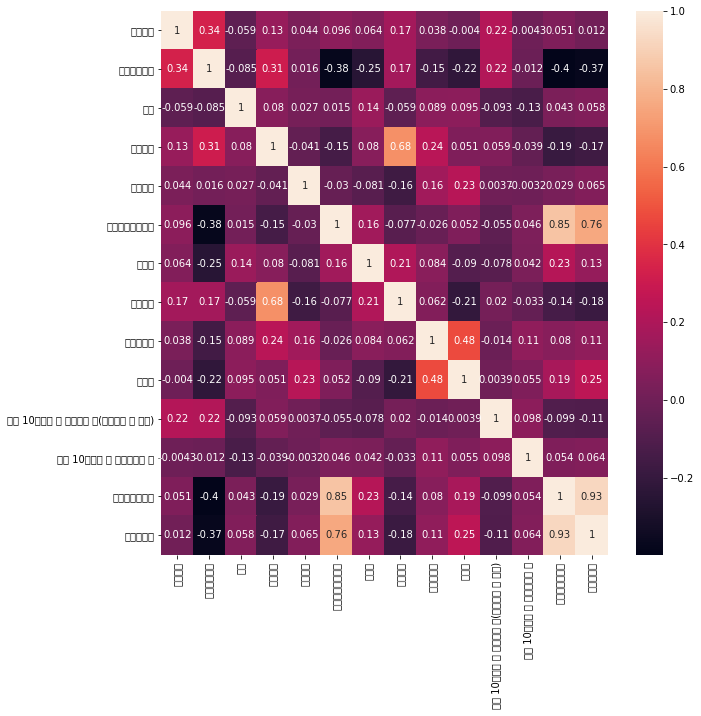

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

결측값 처리

In [43]:
# 임시

train = train.fillna(-1)
test = test.fillna(-1)

In [44]:
x_train = train.iloc[:, 1:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,1:]

scaling


In [45]:
# Scaling

import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, 
    MaxAbsScaler, PowerTransformer
    )

class ScalingFactor:
    def __init__(self, scaler, features):
        self.scaler = scaler
        self.features = features

def scaling(data, scaler, features):

    temp = data.copy()

    target_cols = features
    temp = temp[target_cols]
    
    scaler.fit(temp)

    scaled = scaler.transform(temp)

    data[target_cols] = scaled

    return data

def preprocess_data(data, scale_factors):
    
    temp = data.copy()

    for factor in scale_factors:
        temp = scaling(temp, factor.scaler, factor.features)

    return temp

In [46]:
scale_factors = []

# scale_factors.append(ScalingFactor(PowerTransformer(method='yeo-johnson'),  
#       ['총세대수', '임대건물구분', '지역', 
#        '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
#        '단지내주차면수']
#        ))
# scale_factors.append(ScalingFactor(PowerTransformer(method='box-cox'), 
#       ['총세대수', '임대건물구분', '지역', 
#        '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
#        '단지내주차면수']
#        ))


# scale_factors.append(ScalingFactor(StandardScaler(),  
#       ['총세대수', '임대건물구분', '지역', 
#        '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
#        '단지내주차면수']
#        ))

# scale_factors.append(ScalingFactor(PowerTransformer(),  
#       ['총세대수', '임대건물구분', '지역', 
#        '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
#        '단지내주차면수']
#        ))


# scale_factors.append(ScalingFactor(RobustScaler(),  
#       ['총세대수', '임대건물구분', '지역', 
#        '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
#        '단지내주차면수']
#        ))

# scale_factors.append(ScalingFactor(MinMaxScaler(),  
#       ['총세대수', '임대건물구분', '지역', 
#        '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
#        '단지내주차면수']
#        ))

features_selected = ['총세대수', '임대건물구분', '지역', 
       '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수']

scale_factors.append(ScalingFactor(StandardScaler(), features_selected))
scale_factors.append(ScalingFactor(MinMaxScaler(), features_selected))


x_train = preprocess_data(x_train, scale_factors)
x_test = preprocess_data(x_test, scale_factors)


print(x_train.shape)
print(x_test.shape)
print(x_train)

(2883, 13)
(1008, 13)
          총세대수  임대건물구분  ...  도보 10분거리 내 버스정류장 수   단지내주차면수
0     0.204170     0.0  ...                0.15  0.399922
1     0.204170     0.0  ...                0.15  0.087414
2     0.204170     0.0  ...                0.15  0.028394
3     0.204170     0.0  ...                0.15  0.055972
4     0.204170     0.0  ...                0.15  0.027428
...        ...     ...  ...                 ...       ...
2878  0.483084     0.0  ...                0.15  0.051279
2879  0.483084     0.0  ...                0.15  0.091099
2880  0.483084     0.0  ...                0.15  0.030355
2881  0.483084     0.0  ...                0.15  0.078335
2882  0.483084     0.0  ...                0.15  0.014774

[2883 rows x 13 columns]


feature selection

총세대수>>> 0 : 0.399685
임대건물구분>>> 1 : 0.487124
지역>>> 2 : 0.205186
공급유형>>> 3 : 0.540392
전용면적>>> 4 : 0.397218
전용면적별세대수>>> 5 : 1.406433
공가수>>> 6 : 0.238519
자격유형>>> 7 : 0.518085
임대보증금>>> 8 : 0.425122
임대료>>> 9 : 0.439171
도보 10분거리 내 지하철역 수(환승노선 수 반영)>>> 10 : 0.051906
도보 10분거리 내 버스정류장 수>>> 11 : 0.031628
단지내주차면수>>> 12 : 1.594731


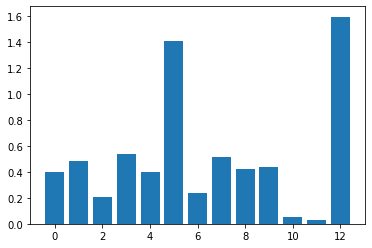

In [47]:
# features' correlation with target

#Correlation Feature Selection
#Mutual Information Feature Selection

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

def select_features(data, target):
    # configure to select all features
    # fs = SelectKBest(score_func=f_regression, k='all')
    fs = SelectKBest(score_func=mutual_info_regression, k='all')

    # learn relationship from training data
    fs.fit(data, target)
    # transform train input data
    train_transformed = fs.transform(data)

    return train_transformed, fs


# feature selection
train_transformed, fs = select_features(x_train, y_train)
# what are scores for the features

for i in range(len(fs.scores_)):
    print(x_train.columns[i]+'>>> %d : %f' % (i, fs.scores_[i]))
    # plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [48]:
x_train.columns

Index(['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수'],
      dtype='object')

In [49]:
# # find optimized features

# # compare different numbers of features selected using mutual information

# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import f_regression
# from sklearn.ensemble import RandomForestRegressor
# # from lightgbm import LGBMRegressor

# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot


# # define number of features to evaluate
# num_features = [i for i in range(1, len(x_train.columns)+1)]

# # enumerate each number of features
# results = []
# scores_mean = []

# model_feature_selection = mutual_info_regression
# # model_feature_selection = f_regression

# for k in num_features:
#     # create pipeline
#     # model = LGBMRegressor()
#     model = RandomForestRegressor(n_jobs=-1, random_state=42)
#     fs = SelectKBest(score_func=model_feature_selection, k=k)
#     # fs = SelectKBest(score_func=f_regression, k=k)

#     pipe = Pipeline(steps=[('sel',fs), ('lr', model)])
#     # evaluate the model
#     cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=42)
#     scores = cross_val_score(pipe, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#     results.append(scores)
#     scores_mean.append(mean(scores))

#     print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# # print(results)
# print(scores_mean)

In [50]:
# # print index which means the most appropriate number of features

# max_value = None
# max_idx = None

# for idx, num in enumerate(scores_mean):
#     if (max_value is None or num > max_value):
#         max_value = num
#         max_idx = idx

# print('Maximum value:', max_value, "At index: ", max_idx)
# print('\nOptimized number of features : ' +str(max_idx+1)) 


In [51]:
# # feature selection

# def select_features(data, target, test):
#     # configure to select all features
#     # fs = SelectKBest(score_func=f_regression, k='all')
#     fs = SelectKBest(score_func=model_feature_selection, k=max_idx+1)

#     # learn relationship from training data
#     fs.fit(data, target)
#     # transform train input data
#     train_selected = fs.transform(data)
    
#     all_features = data.columns
#     # print(all_features)
    
#     selected_mask = fs.get_support()

#     selected_features = all_features[selected_mask]
#     unselected_features = all_features[~selected_mask]
#     print(selected_features)

#     train_selected = pd.DataFrame(train_selected)
#     train_selected.columns = selected_features
#     # print(train_selected.columns)
    
#     test.drop(unselected_features, axis=1, inplace=True)
    
#     return train_selected, fs
 
# # feature selection
# x_train, fs = select_features(x_train, y_train, x_test)

# # plot model performance for comparison

# pyplot.figure(figsize=(20,15))
# pyplot.boxplot(results, labels=num_features, showmeans=True)
# pyplot.show()

# # print(results)
# # print(x_train)
# # print(x_test)

In [52]:
# feature selection

def select_features(data, target, test, k):

    # model_fs = f_regression
    model_fs = mutual_info_regression

    fs = SelectKBest(score_func=model_fs, k=k)

    # learn relationship from training data
    fs.fit(data, target)
    # transform train input data
    train_selected = fs.transform(data)
    
    all_features = data.columns
    # print(all_features)
    
    selected_mask = fs.get_support()

    selected_features = all_features[selected_mask]
    unselected_features = all_features[~selected_mask]
    print(selected_features)

    train_selected = pd.DataFrame(train_selected)
    train_selected.columns = selected_features
    # print(train_selected.columns)
    
    test.drop(unselected_features, axis=1, inplace=True)
    
    return train_selected, fs
 
# feature selection
x_train, fs = select_features(x_train, y_train, x_test, 11)


Index(['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '단지내주차면수'],
      dtype='object')


In [53]:
x_train

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,단지내주차면수
0,0.204170,0.0,0.000000,0.0,0.036546,0.147532,0.309091,0.0,0.028870,0.063656,0.399922
1,0.204170,0.0,0.000000,0.0,0.047269,0.031652,0.309091,0.0,0.045068,0.086885,0.087414
2,0.204170,0.0,0.000000,0.0,0.047269,0.010193,0.309091,0.0,0.045068,0.086885,0.028394
3,0.204170,0.0,0.000000,0.0,0.060058,0.019850,0.309091,0.0,0.072068,0.127821,0.055972
4,0.204170,0.0,0.000000,0.0,0.060058,0.009657,0.309091,0.0,0.072068,0.127821,0.027428
...,...,...,...,...,...,...,...,...,...,...,...
2878,0.483084,0.0,0.133333,0.0,0.060058,0.026288,0.163636,0.0,0.145411,0.206985,0.051279
2879,0.483084,0.0,0.133333,0.0,0.060058,0.046674,0.163636,0.0,0.145411,0.206985,0.091099
2880,0.483084,0.0,0.133333,0.0,0.060934,0.015558,0.163636,0.0,0.145411,0.206985,0.030355
2881,0.483084,0.0,0.133333,0.0,0.068871,0.039700,0.163636,0.0,0.191046,0.248949,0.078335


train_test_split 

In [54]:
from sklearn.model_selection import train_test_split
random_seed = 42

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, 
                                                      random_state=random_seed,shuffle=True)

model selection

In [55]:
# # ALL_models

# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import ARDRegression
# from sklearn.linear_model import BayesianRidge
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import RANSACRegressor
# # from catboost import Pool, CatBoostRegressor
# from sklearn.preprocessing import PolynomialFeatures
# # xgboost, lightgbm, catboost install at Anaconda promtp

# linear = LinearRegression()
# ridge = Ridge()
# lasso = Lasso()
# elasticnet = ElasticNet()
# ard = ARDRegression()
# bayesianridge = BayesianRidge()
# randomforest = RandomForestRegressor()
# xgb = XGBRegressor()
# gbm = GradientBoostingRegressor()
# lgbm = LGBMRegressor()
# ransac = RANSACRegressor()
# # catboost = CatBoostRegressor()
# # polynomial = PolynomialFeatures(degree=4)


# models_list = [linear, ridge, lasso, elasticnet, ard, bayesianridge,
#                 randomforest, xgb, gbm, lgbm, ransac]


In [56]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import cross_val_score

# score_dic = dict()

# def regressor(X_train, Y_train, X_test, Y_test):
    
#     score_dic = dict()

#     for model in models_list:
        
#         model.fit(X_train,Y_train)
#         pred = model.predict(X_test)
#         score = mean_absolute_error(Y_test, pred)
        
#         val_scores = cross_val_score(model, X_train, Y_train, cv=4, scoring='neg_mean_absolute_error',
#                                  verbose=0, n_jobs=-1)
#         val_scores_mean = val_scores.mean()
#         score_dic[model] = score, val_scores_mean
    
#     score_dic = sorted(score_dic.items(), key=lambda t : t[1])
#     return score_dic

# regressor_scores = regressor(X_train,Y_train,X_test,Y_test)
# print(regressor_scores)


In [57]:
# models_scores = []
# models_validation_scores = []
# for i in range(len(models_list)):

#     models_scores.append(regressor_scores[i][1][0])
#     models_validation_scores.append(regressor_scores[i][1][1])
# print(models_scores)
# print(models_validation_scores)

In [58]:
# import matplotlib.pyplot as plt
# import re

# models_name = []
# for model in models_list:

#     models_name.append(str(model).split('(')[0])

# print(models_name)


# plt.barh(models_name, models_scores)
# plt.barh(models_name, models_validation_scores)
# # 위에서 sorted 된거 고려해서 수정필요

model

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [60]:
# !pip install catboost

In [61]:
# # CATBOOST

# from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, 
#                                                       random_state=42, shuffle=True)

# from catboost import CatBoostRegressor
# cat = CatBoostRegressor(
#         loss_function='MAE',
#         n_estimators=300, 
#         learning_rate=0.05, 
#         random_state=42     
#     )
# cat.fit(x_train, y_train, eval_set=(x_valid, y_valid), use_best_model=True)
# pred = cat.predict(x_test)
# pred = np.rint(pred)

# from sklearn.metrics import mean_absolute_error

# score = mean_absolute_error(y_valid, cat.predict(x_valid))
# score

MAE score

In [62]:
# Score

from sklearn.metrics import mean_absolute_error

def Score(model, Y_test, pred):
    
    return mean_absolute_error(Y_test, pred)    

model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("Score : " + str(Score(model, Y_test, pred)))

Score : 14.482875429616273


pred

In [63]:
#Cross Validation scores

from sklearn.model_selection import cross_val_score

def cross_validation_score(model, x_train, y_train):
    
    scores = cross_val_score(model, x_train, y_train, cv=4, scoring='neg_mean_absolute_error',
                             verbose=1, n_jobs=-1 )
    
    scores_mean = scores.mean()
    
    return scores_mean

model.fit(x_train, y_train)
print("\nvalidation set scores = "+ str(cross_validation_score(model, x_train, y_train)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



validation set scores = -19.077750705296914


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.9s finished


In [64]:
pred = model.predict(x_test)
pred = np.rint(pred)

pred을 단지별 데이터로 합해서 submit

In [65]:
code = test['단지코드'].unique()
num_of_code = []

for c in code:
    num_of_code.append(len(test[test['단지코드'] == c]))

pred_submission = []
pred_list = pred.tolist()

for n in num_of_code:
    num = 0
    for j in range(n):
        num += pred_list.pop(0)

    pred_submission.append(num)

pred_submission

[793.0,
 1438.0,
 567.0,
 636.0,
 1232.0,
 1952.0,
 986.0,
 500.0,
 299.0,
 303.0,
 528.0,
 335.0,
 489.0,
 319.0,
 446.0,
 257.0,
 564.0,
 352.0,
 223.0,
 746.0,
 296.0,
 494.0,
 576.0,
 598.0,
 502.0,
 184.0,
 204.0,
 580.0,
 631.0,
 628.0,
 1238.0,
 172.0,
 558.0,
 316.0,
 161.0,
 344.0,
 450.0,
 572.0,
 783.0,
 356.0,
 521.0,
 490.0,
 429.0,
 641.0,
 912.0,
 1248.0,
 555.0,
 666.0,
 433.0,
 389.0,
 901.0,
 330.0,
 1136.0,
 713.0,
 701.0,
 256.0,
 599.0,
 355.0,
 517.0,
 214.0,
 424.0,
 595.0,
 1048.0,
 458.0,
 194.0,
 304.0,
 576.0,
 1100.0,
 603.0,
 543.0,
 758.0,
 336.0,
 633.0,
 1004.0,
 1263.0,
 499.0,
 804.0,
 825.0,
 1088.0,
 984.0,
 1056.0,
 349.0,
 235.0,
 341.0,
 263.0,
 230.0,
 396.0,
 336.0,
 1139.0,
 950.0,
 685.0,
 337.0,
 639.0,
 1252.0,
 1032.0,
 695.0,
 1176.0,
 900.0,
 705.0,
 712.0,
 424.0,
 782.0,
 722.0,
 902.0,
 740.0,
 1235.0,
 670.0,
 914.0,
 287.0,
 557.0,
 881.0,
 980.0,
 1134.0,
 773.0,
 146.0,
 177.0,
 556.0,
 833.0,
 1446.0,
 636.0,
 908.0,
 771.0,
 427.

In [66]:
pred_submission.insert(77,99999)
pred_submission.insert(130,99999)
pred_submission.insert(140,99999)

In [67]:
submission['num'] = pred_submission

submission.to_csv(data_path + '/submission/sample_submission.csv', index=False)